## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import math

## Loading data

In [28]:
df = pd.read_csv('BTP.csv')
df.shape

(86, 14)

In [29]:
df.sample(5)

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,Total area,area without finger,total length,finger length,Effective area
55,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.0860,66.980000,38.720000,16.853333,11.116667,1.583597
1,0.0375,0.2,0.025,0.003125,0.05,0.2,26.62,23.2,0.0980,52.930000,30.460000,11.280000,6.400000,1.576359
78,0.0750,0.0,0.050,0.006250,0.10,0.0,23.80,20.4,0.0760,71.086667,35.333333,16.583333,11.746667,1.361604
43,0.0750,0.4,0.000,0.000000,0.10,0.0,22.87,11.2,0.0736,72.066667,38.263333,15.866667,10.000000,1.454464
45,0.0000,0.4,0.050,0.000000,0.10,0.0,24.89,21.2,0.0846,77.750000,43.530000,18.580000,12.490000,1.533643


Here, we have a total of <b>14 features</b> in the dataset. Which, we can divide into 3 subparts - 

Inputs (additives)
- Dynol
- Non Ionic
- Pusher
- Hydrogel
- Silica
- CTAB

Measured (Properties)
- Surface Tension
- Contact Angle
- Average viscosity

 Output (Target values)
- Total area
- area without finger
- total length
- finger length
- Effective area

In [30]:
features_input = np.array(['Dynol','Non ionic','Pushar','Hydrogel','Silica','CTAB'])
features_measured = np.array(['Surface Tension','Contact Angle','Average viscosity'])
features_output = np.array(['area without finger','finger length','Effective area'])

## Feature engineering and selection

### Checking for null values

In [31]:
df.isnull().sum()

Dynol                  0
Non ionic              0
Pushar                 0
Hydrogel               0
Silica                 0
CTAB                   0
Surface Tension        0
Contact Angle          0
Average viscosity      0
Total area             0
area without finger    0
total length           0
finger length          0
Effective area         0
dtype: int64

### Checking for duplicates

In [32]:
df[df.duplicated()==True]

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,Total area,area without finger,total length,finger length,Effective area
20,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
26,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
42,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
49,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
51,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
53,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
55,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
66,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597
67,0.0375,0.2,0.025,0.003125,0.05,0.1,25.91,20.8,0.086,66.98,38.72,16.853333,11.116667,1.583597


In [33]:
df = df.drop_duplicates()

In [34]:
df.reset_index(drop=True).tail()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,Total area,area without finger,total length,finger length,Effective area
72,0.0375,0.0,0.025,0.003125,0.05,0.1,25.20,22.30,0.094,69.346667,30.583333,18.626667,14.006667,1.208130
73,0.0000,0.0,0.050,0.000000,0.00,0.2,30.64,25.96,0.098,31.267000,23.700000,6.960000,2.930000,2.076427
74,0.0750,0.4,0.000,0.000000,0.00,0.0,22.26,9.05,0.065,97.653333,40.766667,24.200000,18.066667,1.143596
75,0.0000,0.4,0.000,0.006250,0.00,0.2,25.40,22.40,0.150,49.620000,33.990000,10.760000,5.270000,1.876685
76,0.0000,0.0,0.050,0.006250,0.00,0.0,32.84,17.10,0.105,45.767000,28.233000,11.433000,6.307000,1.689925


### Correlation matrix

<AxesSubplot:>

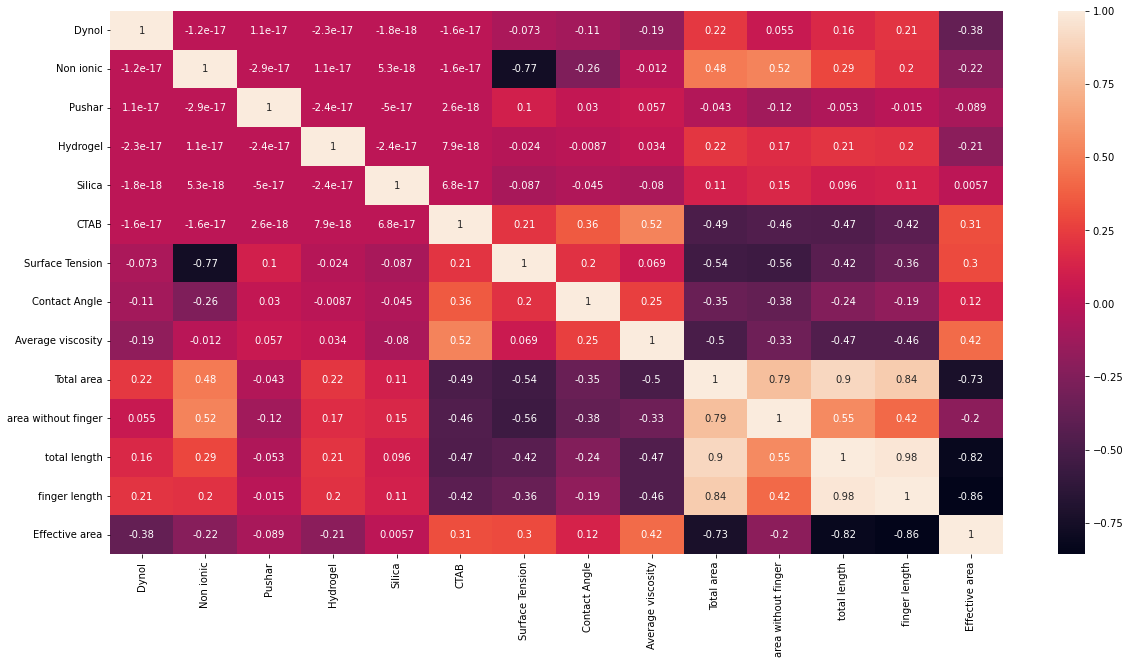

In [35]:
fig, ax = plt.subplots(figsize=(20,10))        
sns.heatmap(df.corr(),annot=True,ax=ax)

For better accuracy, considering a threshold of <b>0.9</b>, From here we are removing two features from the dataset <b>Total area</b> and <b>total length</b> but not <b>finger length</b> as<br> our target is to minimize finger length, we can use this data in future processs.

In [36]:
df.drop(['Total area','total length'],axis=1,inplace=True)

In [37]:
df.shape

(77, 12)

In [38]:
df.head()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,area without finger,finger length,Effective area
0,0.0750,0.4,0.000,0.006250,0.00,0.2,23.47,21.58,0.060,37.303333,14.046667,1.127079
1,0.0375,0.2,0.025,0.003125,0.05,0.2,26.62,23.20,0.098,30.460000,6.400000,1.576359
2,0.0375,0.2,0.025,0.003125,0.00,0.1,27.24,25.00,0.070,30.566667,9.533333,1.523732
3,0.0000,0.0,0.000,0.006250,0.00,0.2,30.64,25.53,0.095,23.787000,5.100000,1.769078
4,0.0000,0.0,0.050,0.000000,0.10,0.2,30.75,20.12,0.060,21.433000,3.277000,2.018137


### Statistical analysis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 85
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dynol                77 non-null     float64
 1   Non ionic            77 non-null     float64
 2   Pushar               77 non-null     float64
 3   Hydrogel             77 non-null     float64
 4   Silica               77 non-null     float64
 5   CTAB                 77 non-null     float64
 6   Surface Tension      77 non-null     float64
 7   Contact Angle        77 non-null     float64
 8   Average viscosity    77 non-null     float64
 9   area without finger  77 non-null     float64
 10  finger length        77 non-null     float64
 11  Effective area       77 non-null     float64
dtypes: float64(12)
memory usage: 7.8 KB


In [40]:
df.describe()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,area without finger,finger length,Effective area
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.037500,0.200000,0.025000,0.003125,0.050000,0.100000,26.770649,19.275779,0.083677,33.549513,10.142403,1.512754
std,0.034946,0.186378,0.023297,0.002912,0.046595,0.093189,3.204398,4.997102,0.018805,7.087782,4.633655,0.272028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.700000,9.050000,0.050000,18.750000,2.370000,0.807770
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.080000,16.360000,0.068000,28.400000,6.480000,1.326376
50%,0.037500,0.200000,0.025000,0.003125,0.050000,0.100000,25.910000,20.120000,0.084600,32.410000,9.993333,1.501660
75%,0.075000,0.400000,0.050000,0.006250,0.100000,0.200000,29.400000,22.400000,0.095000,38.166667,12.490000,1.651147
max,0.075000,0.400000,0.050000,0.006250,0.100000,0.200000,33.000000,35.000000,0.150000,53.600000,26.000000,2.123534


### Checking for outliers

Here, we will check for outliers for measured and output features.

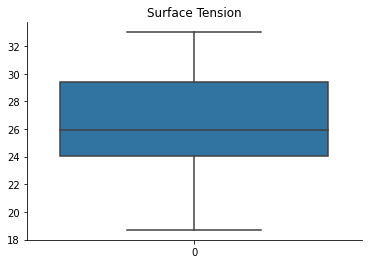

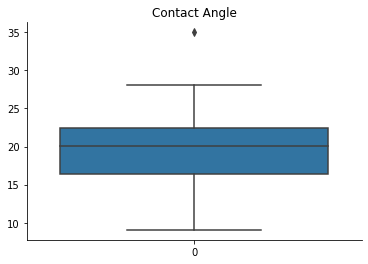

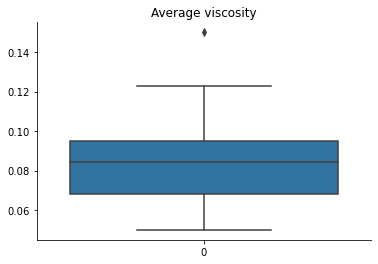

In [41]:
for features in features_measured:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

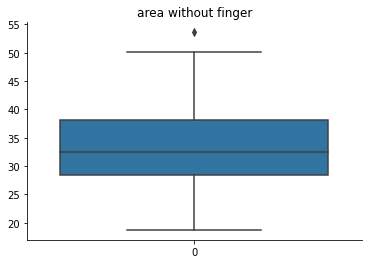

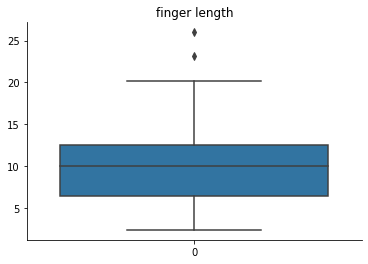

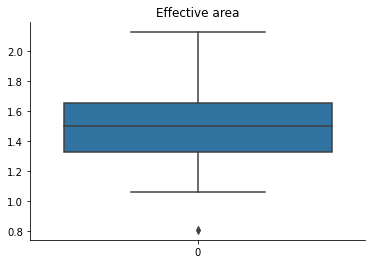

In [42]:
for features in features_output:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

From the above box plots, it is clear that we have outliers in multiple features, which we have to drop in order to get better results.

### Dropping outliers

In [43]:
for features in features_measured:
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    indu = df[(df[features]>upper)].index
    indl = df[(df[features]<lower)].index

    df = df.drop(indu,axis=0)
    df = df.drop(indl,axis=0)

In [44]:
for features in features_output:
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    indu = df[(df[features]>upper)].index
    indl = df[(df[features]<lower)].index

    df = df.drop(indu,axis=0)
    df = df.drop(indl,axis=0)

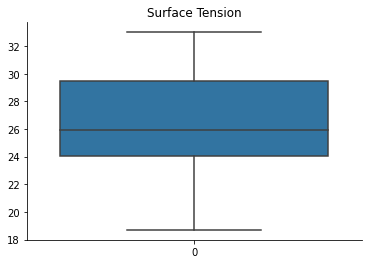

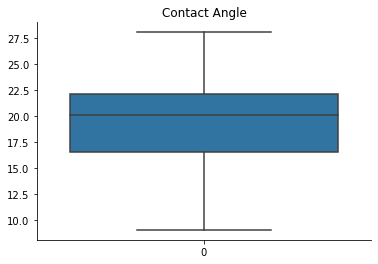

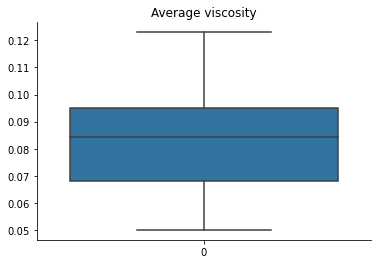

In [45]:
for features in features_measured:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

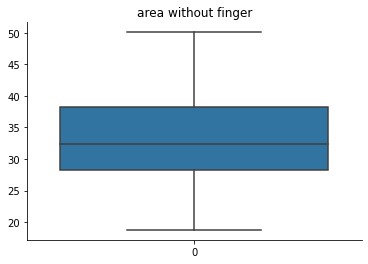

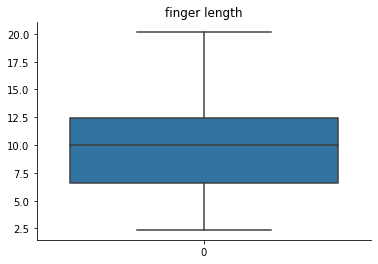

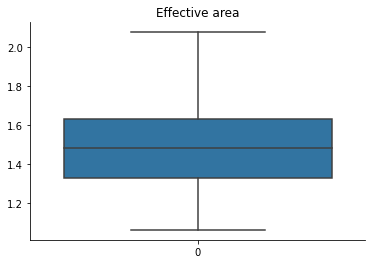

In [46]:
for features in features_output:
    sns.boxplot(df[features])
    sns.despine()
    plt.title(features)
    plt.show()

In [47]:
df.shape

(71, 12)

In [48]:
df.reset_index(drop=True).tail()

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,area without finger,finger length,Effective area
66,0.0750,0.0,0.000,0.006250,0.10,0.0,24.10,21.00,0.100,34.166667,9.861667,1.548747
67,0.0375,0.0,0.025,0.003125,0.05,0.1,25.20,22.30,0.094,30.583333,14.006667,1.208130
68,0.0000,0.0,0.050,0.000000,0.00,0.2,30.64,25.96,0.098,23.700000,2.930000,2.076427
69,0.0750,0.4,0.000,0.000000,0.00,0.0,22.26,9.05,0.065,40.766667,18.066667,1.143596
70,0.0000,0.0,0.050,0.006250,0.00,0.0,32.84,17.10,0.105,28.233000,6.307000,1.689925


In [49]:
df.sample(5)

,Dynol,Non ionic,Pushar,Hydrogel,Silica,CTAB,Surface Tension,Contact Angle,Average viscosity,area without finger,finger length,Effective area
29,0.075,0.0,0.00,0.00000,0.1,0.2,29.71,26.500,0.0600,29.500,11.250,1.251931
57,0.075,0.4,0.00,0.00625,0.1,0.0,24.58,9.635,0.0500,46.800,14.000,1.328535
39,0.000,0.4,0.05,0.00625,0.1,0.0,24.70,14.000,0.0650,42.400,14.150,1.405753
7,0.075,0.4,0.05,0.00625,0.0,0.0,22.87,20.300,0.0565,46.000,11.800,1.482496
4,0.000,0.0,0.05,0.00000,0.1,0.2,30.75,20.120,0.0600,21.433,3.277,2.018137


In [50]:
df.to_csv('data.csv', index=False)